# Algerian Forest Fires Dataset
- Data Set Information:

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.

- The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

- Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.shape

(246, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [10]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [12]:
df['region']=df['region'].astype(int)

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df = df.drop([122]).reset_index(drop=True)

In [15]:
display(df.iloc[122])

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
region                   1
Name: 122, dtype: object

In [16]:
df=df.dropna().reset_index()

In [17]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [18]:
df.iloc[[122]]
df=df.drop([122])

In [19]:
df.columns=df.columns.str.strip()

In [20]:
df[["day","month","year","Temperature","RH","Ws"]] =df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [21]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [22]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 32.3+ KB


In [24]:
df.describe()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,121.818930,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,71.105382,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,183.500000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,244.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
df[df['Rain']>16]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
91,91,31,8,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire,0


In [26]:
df[df['DMC']>65]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
209,210,27,8,2012,36,54,14,0.0,91.0,65.9,177.3,10.0,68.0,26.1,fire,1


In [27]:
df[df['DC']>220]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
89,89,29,8,2012,35,48,18,0.0,90.1,54.2,220.4,12.5,67.4,30.2,fire,0


# EDA AND Feature Engineering 

In [28]:
df1=df.copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 32.3+ KB


In [30]:
df1=df1.drop(['day','month','year'],axis=1)

In [31]:
df1

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,240,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,241,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,242,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,243,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [32]:
df1['Classes']=np.where(df1['Classes'].str.contains('not fire'),0,1)

In [33]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [34]:
df1.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
import seaborn as sns

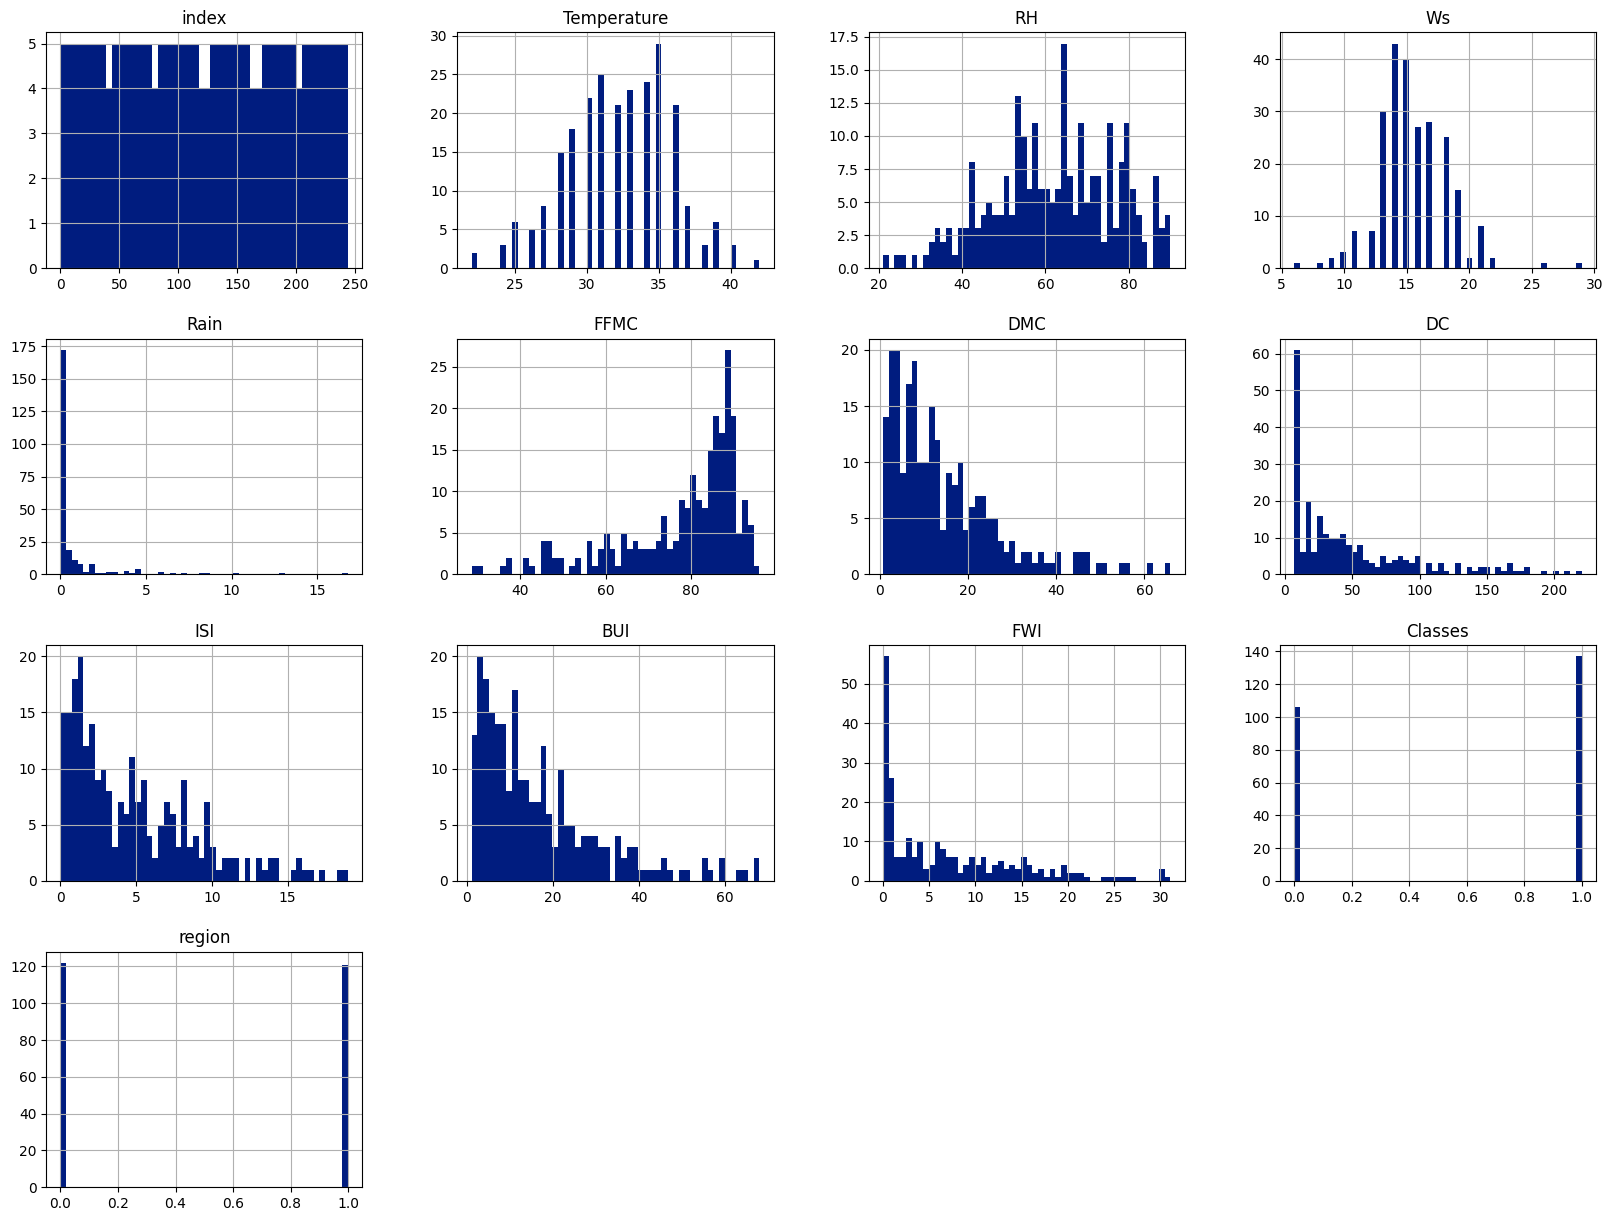

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

plt.style.use('seaborn-v0_8-dark-palette')
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [37]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [38]:
percentage=df1['Classes'].value_counts(normalize=True)*100

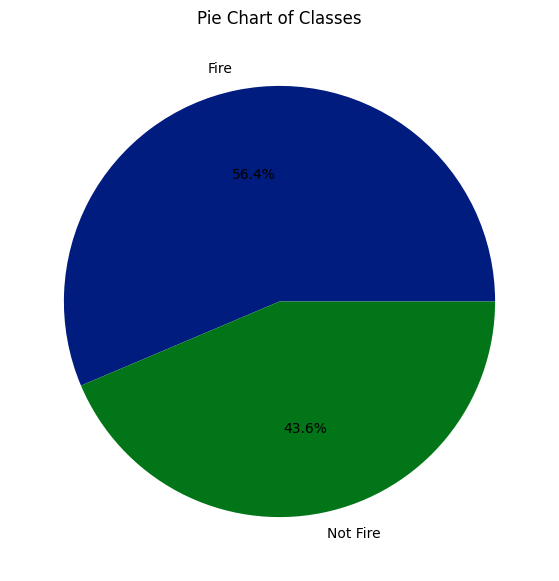

In [39]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [40]:
df1.corr()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
index,1.000000,0.216816,-0.377743,-0.170645,-0.031379,0.227536,0.259115,0.057285,0.281209,0.181577,0.253197,0.176564,0.867710
Temperature,0.216816,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.377743,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.170645,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.031379,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.227536,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.259115,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.057285,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.281209,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.181577,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


<Axes: >

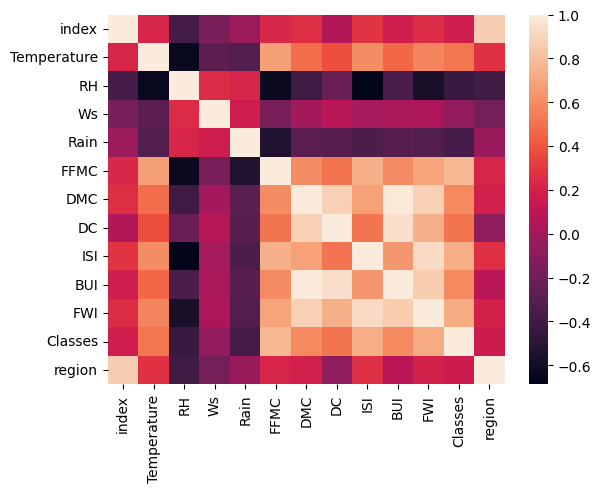

In [41]:
sns.heatmap(df1.corr())

<Axes: ylabel='FWI'>

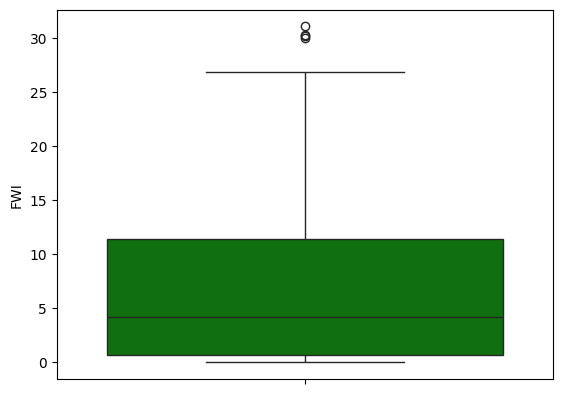

In [42]:
sns.boxplot(df['FWI'],color='green')

In [43]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [45]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

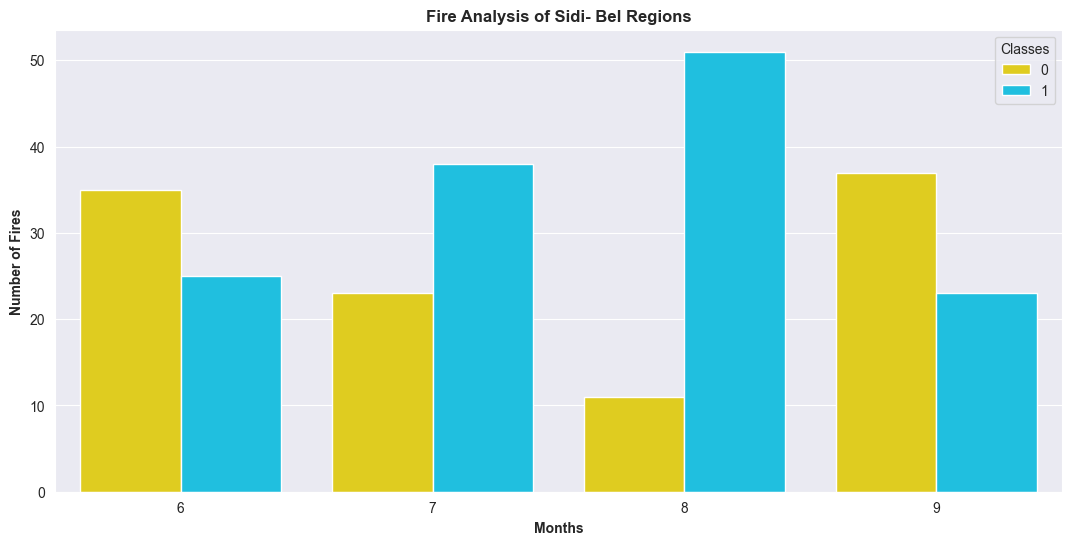

In [49]:
# Monthly fire analysis
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style("darkgrid")
sns.countplot(x='month',hue='Classes',data=df,palette="jet_r")
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

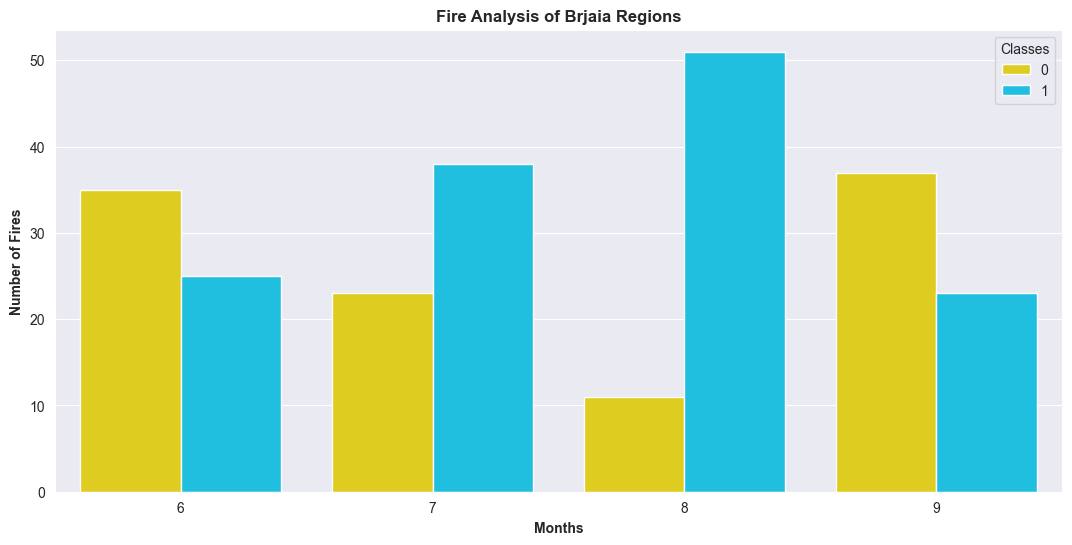

In [52]:
dftemp=df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df,palette="jet_r")
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')
plt.show()